In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('tvmarketing.csv')

In [3]:
data.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


#### Splitting data

In [5]:
# training dataset and labels
train_input = np.array(data.TV[0:150]).reshape(150,1)
train_output  = np.array(data.Sales[0:150]).reshape(150,1)

# valid dataset and labels
test_input = np.array(data.TV[150:200]).reshape(50,1)
test_output  = np.array(data.Sales[150:200]).reshape(50,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (150, 1)
Train Output  Shape = (150, 1)
Test Input Shape = (50, 1)
Test Output  Shape = (50, 1)


# <font color = "green">Linear Regression</font>

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [6]:
def Model_prediction(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [7]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

<u>Using Chain Rule:</u>
- cost
- f = f(x)

Partial Derivative of cost function w.r.t m
**dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c
**dcost/dc = dcost/df * df/dc **

<u>Partial Derivatives:</u>
- dc/df = (y - f) * -1
- df/dw = x
- df/db = 1

In [28]:
def aligning_to_BestLine(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update the Parameters

- m = m - (learning_rate * dm)
- c = c - (learning_rate * dc)

In [29]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Train the Data

In [46]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):


        predictions = Model_prediction(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()


        derivatives = aligning_to_BestLine(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

## Training

Iteration = 1, Loss = 96.20567429678427


<Figure size 640x480 with 0 Axes>

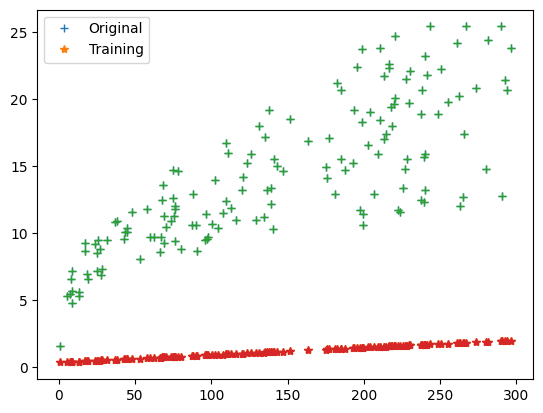

Iteration = 2, Loss = 55.175963791855295


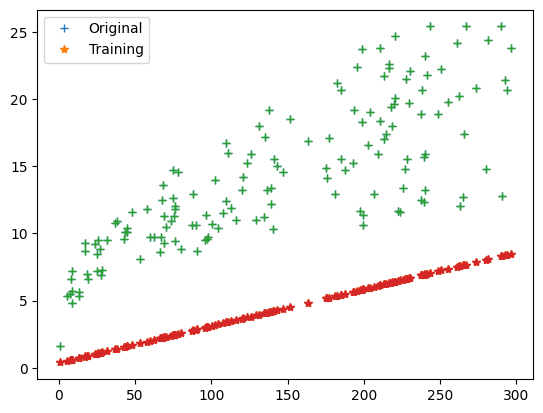

Iteration = 3, Loss = 33.87253365711367


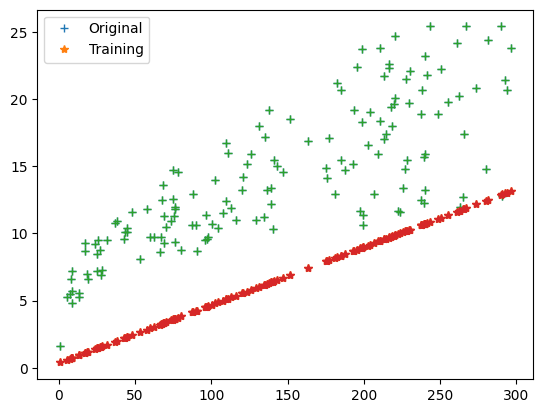

Iteration = 4, Loss = 22.81136777360258


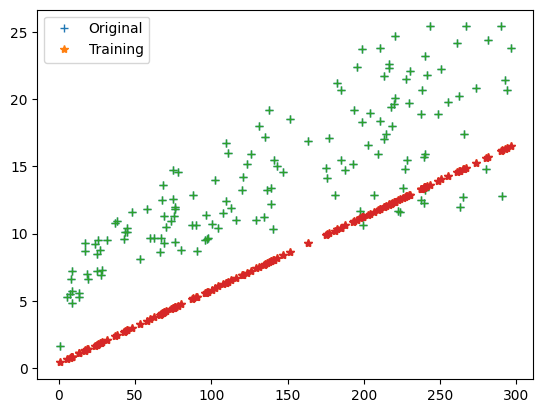

Iteration = 5, Loss = 17.068182524257768


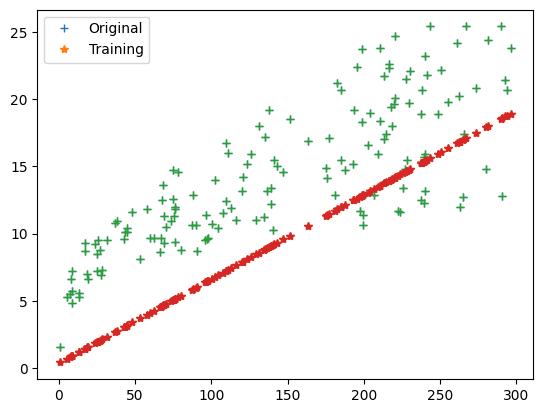

Iteration = 6, Loss = 14.086195124535116


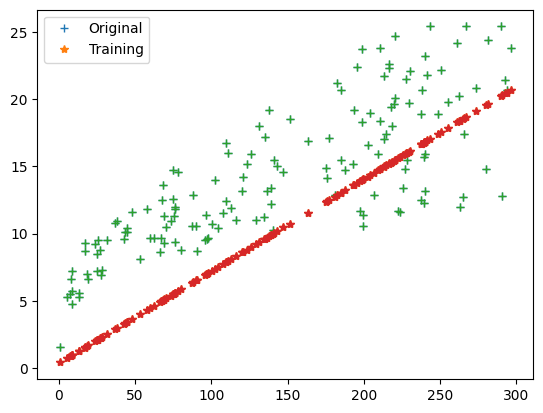

Iteration = 7, Loss = 12.53787476676795


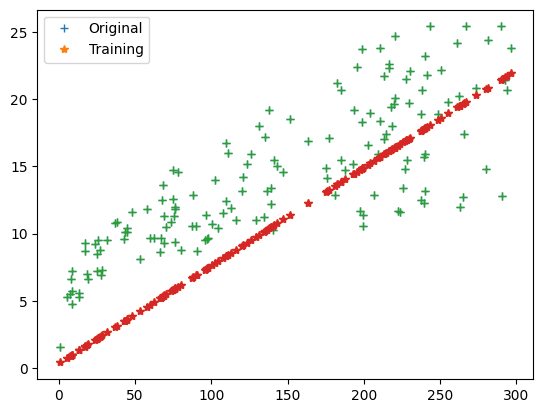

Iteration = 8, Loss = 11.733941917333961


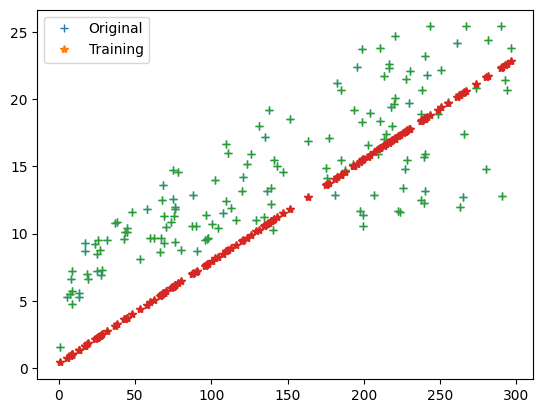

Iteration = 9, Loss = 11.316509382409228


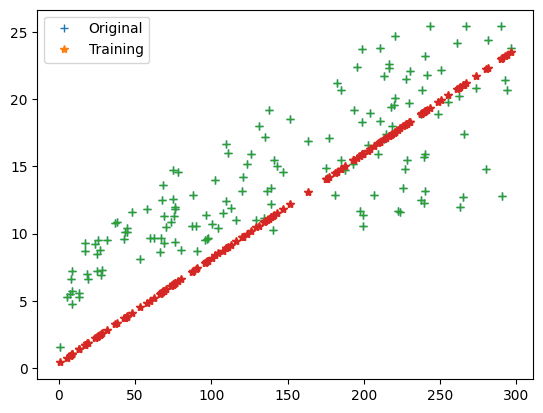

Iteration = 10, Loss = 11.099755246130343


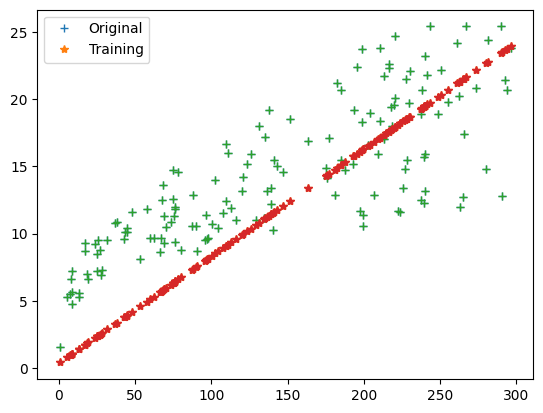

Iteration = 11, Loss = 10.987197195044795


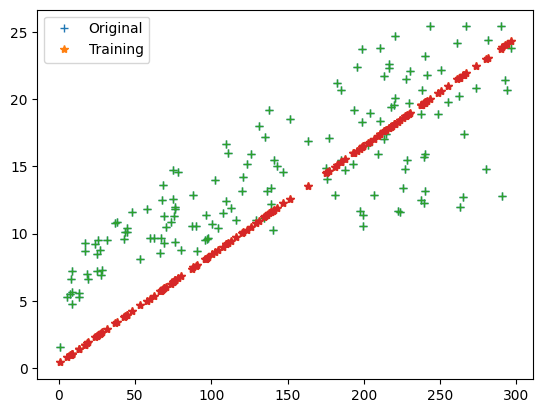

Iteration = 12, Loss = 10.92873975593624


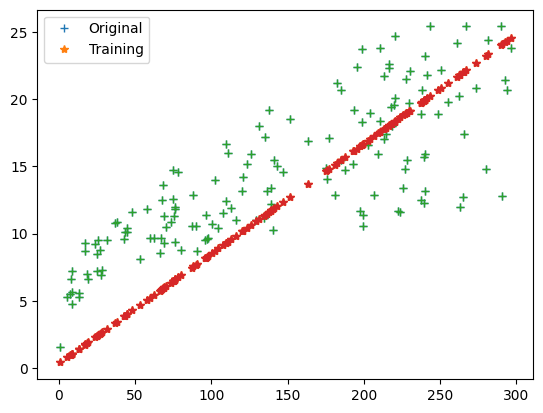

Iteration = 13, Loss = 10.89837239540256


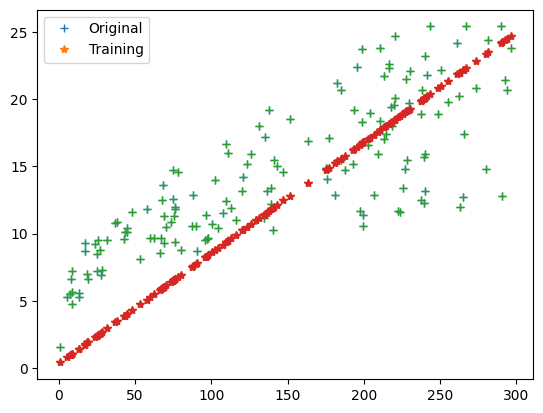

Iteration = 14, Loss = 10.882589944125545


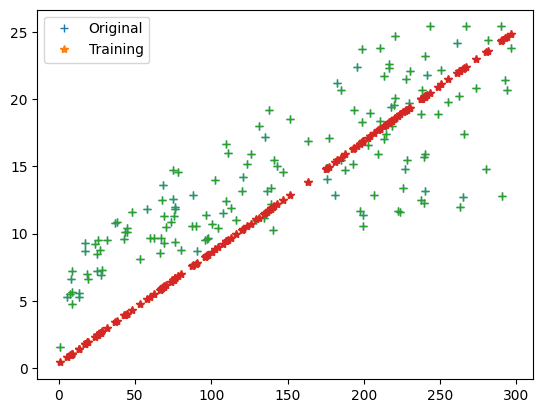

Iteration = 15, Loss = 10.87438025839042


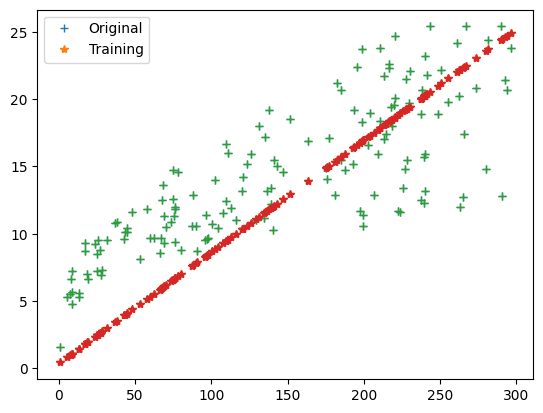

Iteration = 16, Loss = 10.870102498284846


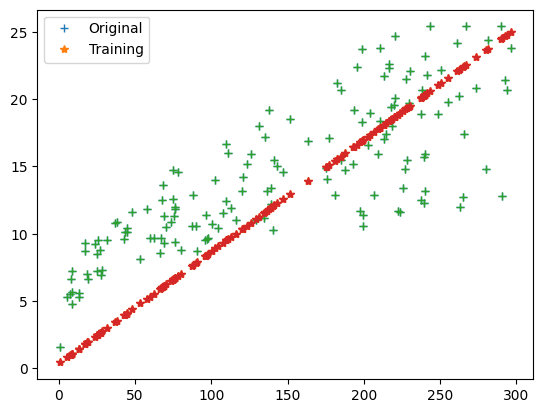

Iteration = 17, Loss = 10.867866269685932


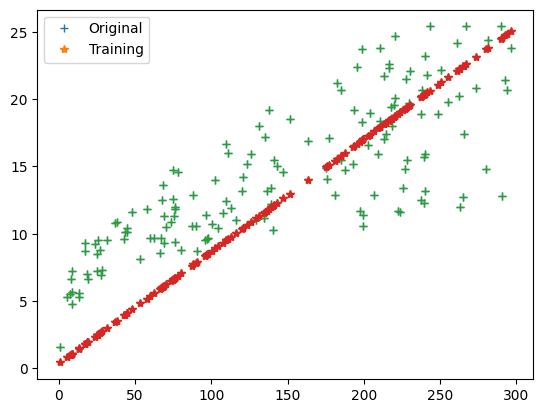

Iteration = 18, Loss = 10.86669004359875


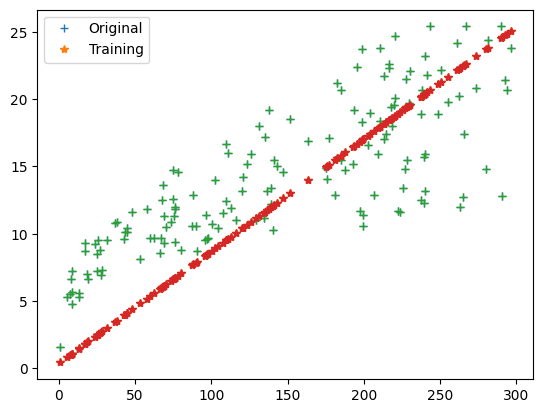

Iteration = 19, Loss = 10.86606419128703


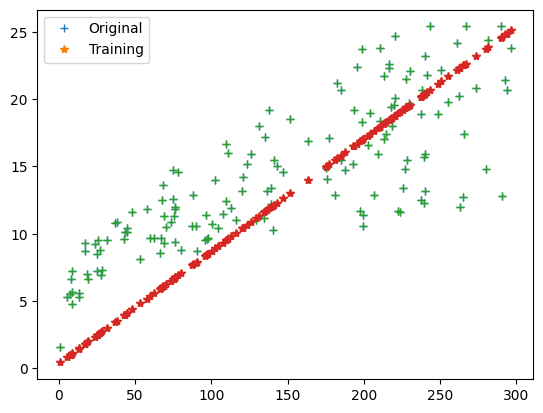

Iteration = 20, Loss = 10.865724103706958


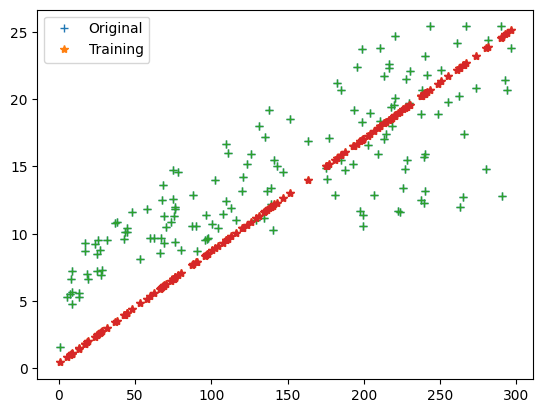

In [47]:
parameters, loss = train(train_input, train_output, 0.00001, 20)

In [48]:
print(parameters)

{'m': 0.083570597316652, 'c': 0.36920039304905405}


**Predictions: (huhhh...finally)**

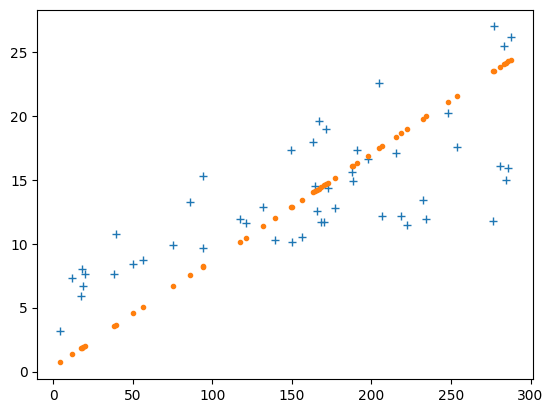

In [49]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for test data

In [50]:
cost_function(test_predictions, test_output)

11.20030289164179